In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares as nls

In [2]:
def Read_file(filename):
    data = []
    filename = filename + ".txt"
    file = open(filename, "r")
    for coor in file:
        data.append(coor.split())
    data = np.array(data, dtype='float')
    return data

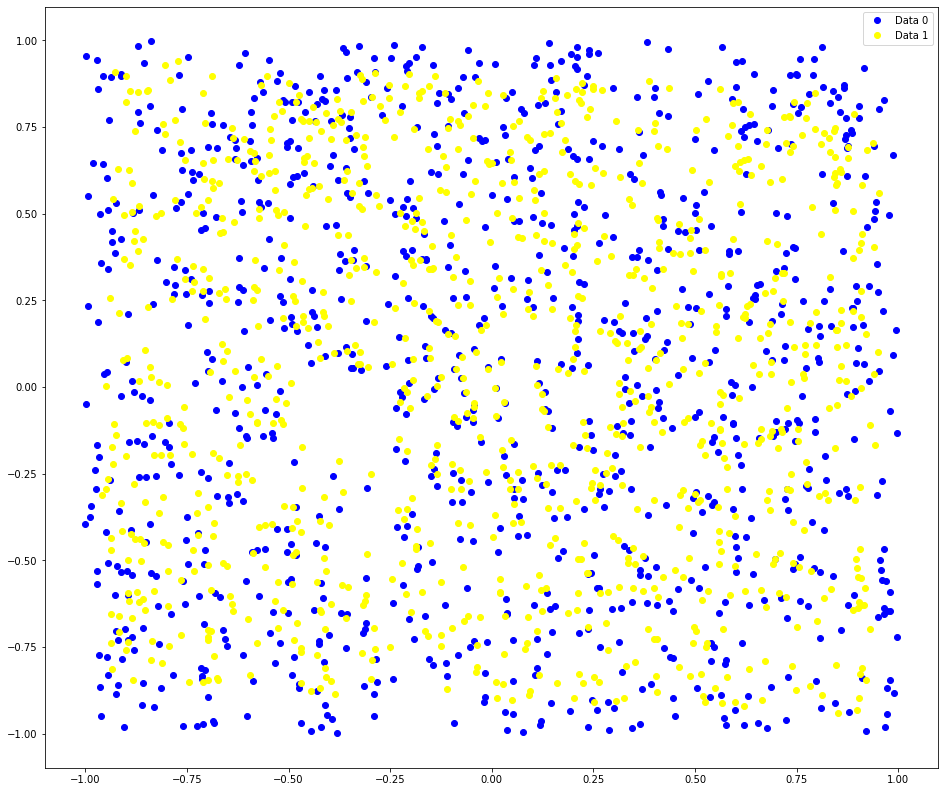

In [3]:
x0 = Read_file("linear_vectorfield_data_x0")
x1 = Read_file("linear_vectorfield_data_x1")

plt.figure(figsize=(16,14))
plt.plot(x0[:,0], x0[:,1], 'o', label="Data 0", color="blue")
plt.plot(x1[:,0], x1[:,1], 'o', label="Data 1", color="yellow")
plt.legend()
plt.show()

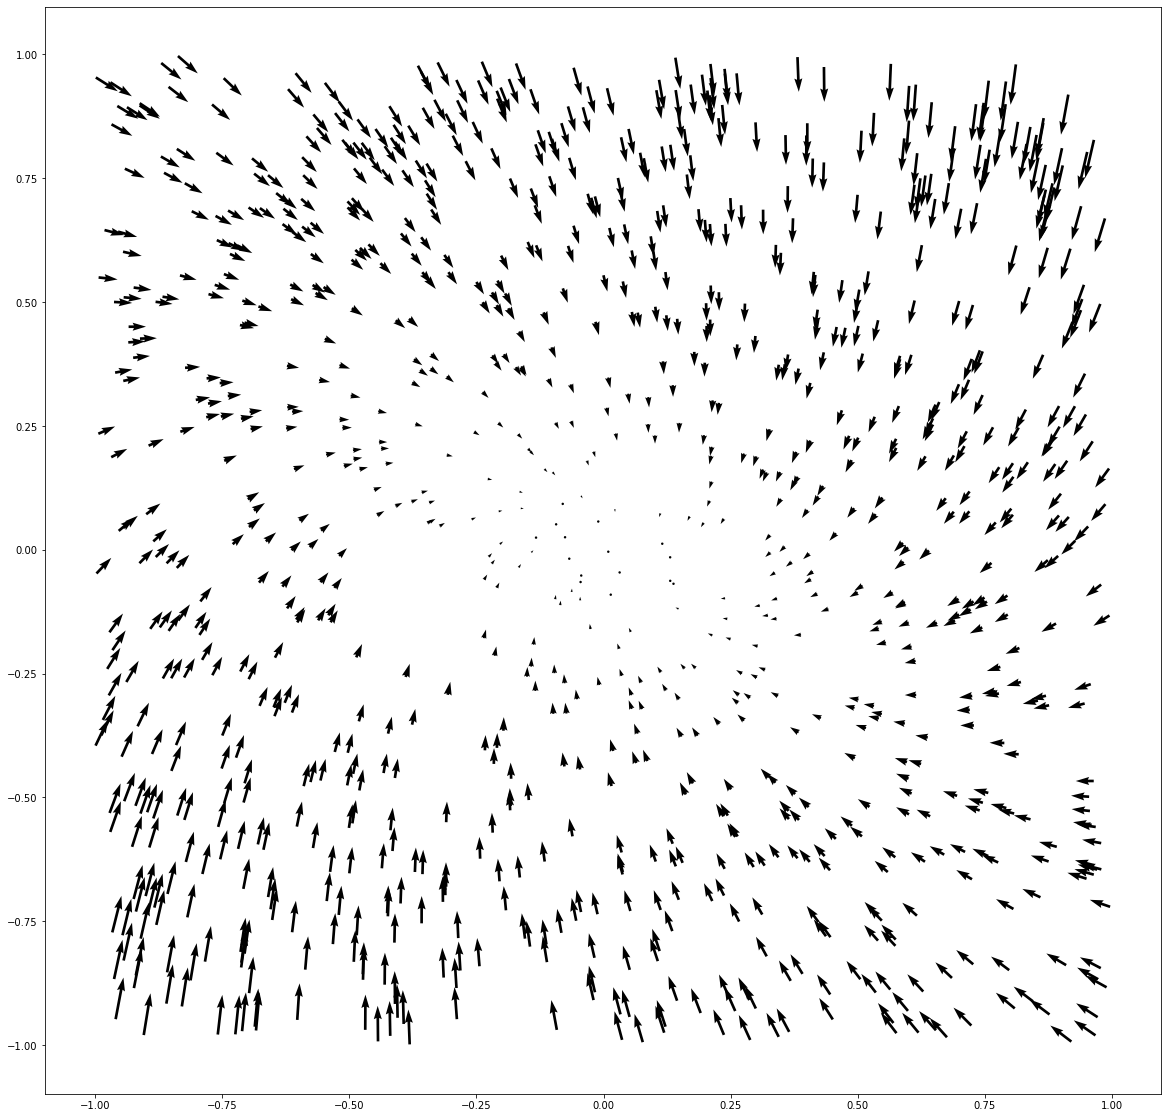

In [4]:
dt = 0.1
dx = x1 - x0
v = dx/dt

vx = v[:,0]
vy = v[:,1]

plt.figure(figsize=(20,20))
plt.quiver(x0[:,0], x0[:,1], vx, vy)
plt.show()

In [5]:
coef = np.linalg.lstsq(x0, v, rcond=None)
A = coef[0]
print(A)

[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


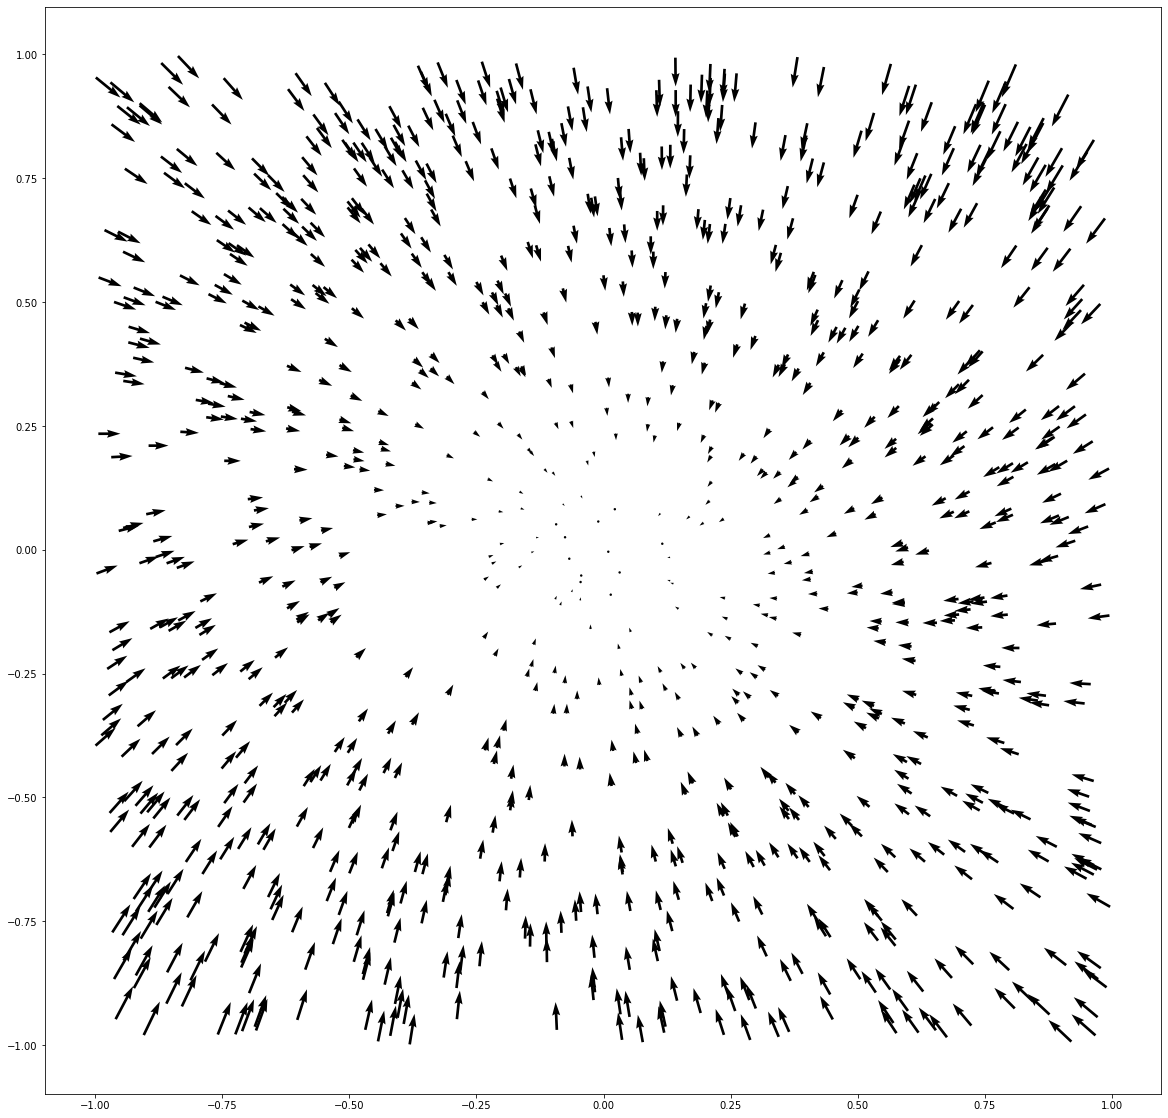

In [6]:
x_hat = x0.dot(A)

dx_hat = x_hat - x0
v_hat = dx_hat/dt
vx_hat = v_hat[:,0]
vy_hat = v_hat[:,1]

plt.figure(figsize=(20, 20))
plt.quiver(x0[:,0], x0[:,1], vx_hat, vy_hat)
plt.show()

In [7]:
ax=0 #the average is performed along the column, for each row, returning an array
mse = (np.square(x1 - x_hat)).mean(axis=ax)
print(mse)

[0.70778453 1.25617265]


In [8]:
s = np.array([-10, 10])

T = 100.0
trajectory = []
trajectory.append(s)
for i in range(int(T/dt)-1):

    s = s.dot(A)
    trajectory.append(s)

trajectory = np.array(trajectory)

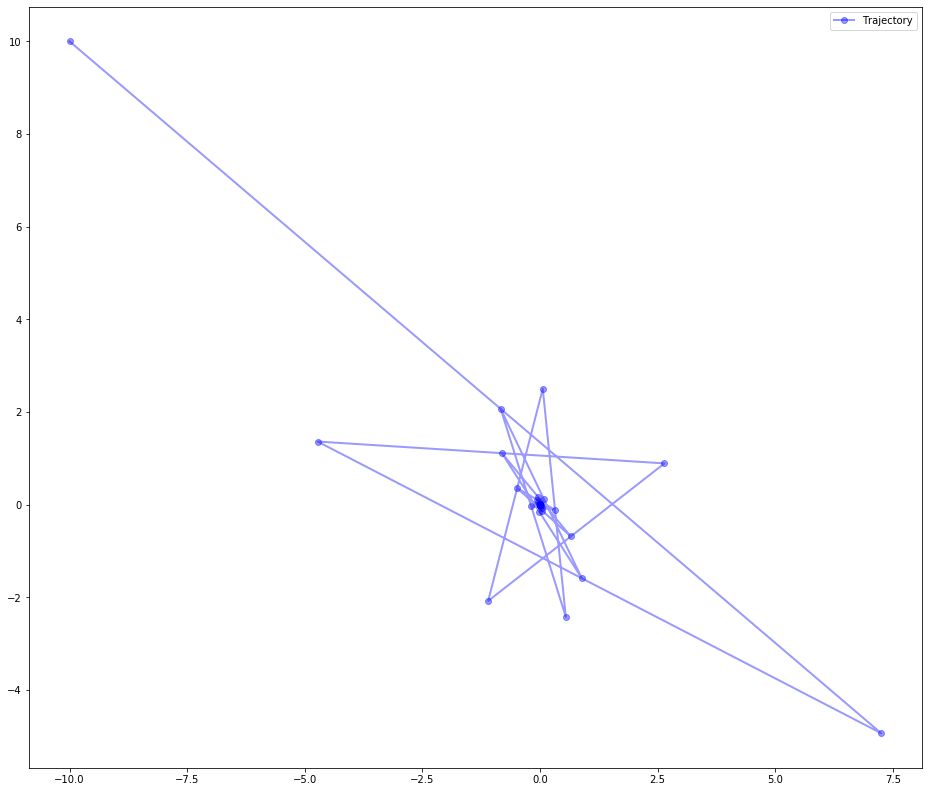

In [9]:
plt.figure(figsize=(16,14))
plt.plot(trajectory[:,0], trajectory[:,1], alpha=0.4, linewidth=2, marker='o', label="Trajectory", color="blue")
plt.legend()
plt.show()